In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pickle
import logging
import joblib

logging.basicConfig(level=logging.INFO)

In [44]:
def reduce_features(X, y, n_components=100, save_path=None):
    """
    Reduce the dimensionality of features using PCA.
    
    Args:
    X (np.array): Input features
    y (np.array): Labels
    n_components (int): Number of components for PCA
    
    Returns:
    np.array: Reduced features
    """
    pca = PCA(n_components=min(n_components, X.shape[0], X.shape[1]))
    X_reduced = pca.fit_transform(X)
    if save_path:
        joblib.dump(pca, save_path)
        print(f"PCA model saved to {save_path}")


    return X_reduced



In [45]:
!pwd

/Users/mahmoudhamsho/repos/emotion_recognition/notebooks


PCA model saved to /Users/mahmoudhamsho/repos/emotion_recognition/notebooks/utils/pca_model.joblib
Reduced features shape: (50, 50)


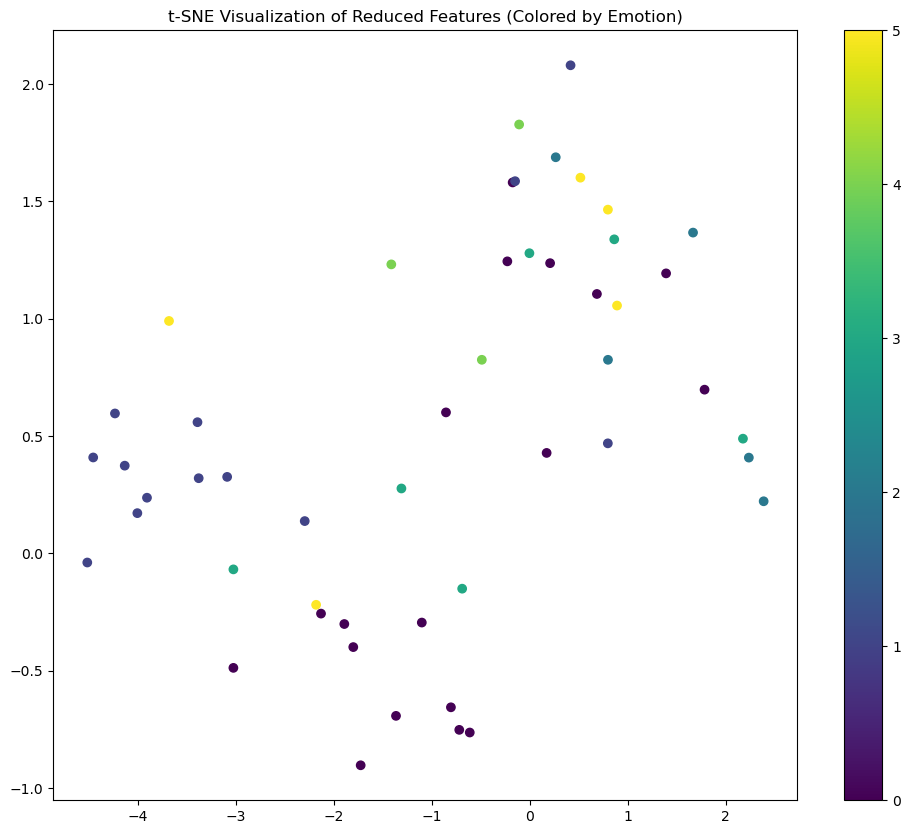

Reduced features and updated metadata saved successfully.


In [46]:
# Load engineered features
X_engineered = np.load('data/engineered_features.npy')

# Load metadata
metadata_df = pd.read_csv('data/metadata.csv')

# Feature reduction
X_reduced = reduce_features(X_engineered, metadata_df['emotion'], save_path = '/Users/mahmoudhamsho/repos/emotion_recognition/notebooks/utils/pca_model.joblib')
print("Reduced features shape:", X_reduced.shape)

# Visualize reduced features using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_reduced)

plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=metadata_df['emotion'].astype('category').cat.codes, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE Visualization of Reduced Features (Colored by Emotion)')
plt.show()

# Save reduced features
np.save('data/reduced_features.npy', X_reduced)

# Update metadata summary
with open('data/metadata_summary.pkl', 'rb') as f:
    metadata_summary = pickle.load(f)

metadata_summary['reduced_features_shape'] = X_reduced.shape

with open('data/metadata_summary.pkl', 'wb') as f:
    pickle.dump(metadata_summary, f)

print("Reduced features and updated metadata saved successfully.")



In [10]:
X_reduced.shape

(50, 50)